In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Vamos utilizar o método do mínimos quadrados para gerar uma reta que melhor descreve o comportamento (IDH x tempo). Para isso, será necessário implementar o algoritmo de gauss que resolve um sistema linear para encontrar os coeficientes A e B, tais que:
y = Ax + B

In [32]:

def gauss(A, b):

  A_ant = [row[:] for row in A]
  b_ant = b.copy()

  for k in range(len(A)-1):

    for i in range(k+1, len(A)):
      
      m_ik = A_ant[i][k]/A_ant[k][k]
      b_i = b_ant[i] - m_ik*b_ant[k]
      b_ant[i] = b_i

      for j in range(k, len(A)):

        a_ij = A_ant[i][j] - m_ik*A_ant[k][j]
        A_ant[i][j] = a_ij
      

  return (A_ant, b_ant)

def triangulo_sup(A, b):
  
  n = len(A)-1
  x = [0]*len(A)
  if (A[n][n] !=0 ):
    x[n] = b[n]/A[n][n]
  k = n 

  while (k >= 1):
    k -= 1
    soma = b[k]
    j = k
    while (j < n):
      j += 1 
      soma -= A[k][j]*x[j]
    
    x[k] = soma/A[k][k]

  return (x)

def linear_solve(A, b):
  (A_result, b_result) = gauss(A,b)
  solution = triangulo_sup(A_result, b_result)
  return solution

In [33]:
def g(num, x):
  if (num == 0):
    return 1
  if (num == 1):
    return x

def getA(x, y, n):
 
  A = np.zeros((n, n), dtype=np.float64)

  for i in range(n):

    for j in range(n):

      a_ij = 0

      for m in range(len(x)):

        a_ij += g(i, x[m])*g(j, x[m])
      
      A[i][j] = a_ij

  return A

def getB(x, y, n):

  B = [0]*n

  for i in range(n):

    b_i = 0

    for m in range(len(y)):
      
      b_i += g(i, x[m])*y[m]

    B[i] = b_i
  
  return B

In [34]:
IDH_data = pd.read_csv('../data/processed/IDH_data.csv')

data_filtered = IDH_data["country"] == 'China'

china_data = IDH_data[data_filtered]
y = china_data["HDI_VALUE"].to_numpy()
x = china_data["year"].to_numpy()

A = getA(x, y, 2)
B = getB(x, y, 2)

alpha = linear_solve(A, B)

print("Solução: ")
print("Coeficiente linear (B): ", alpha[0])
print("Coeficiente angulas (A): ", alpha[1])

Solução: 
Coeficiente linear (B):  -19.31221469270665
Coeficiente angulas (A):  0.00995543345542944


Agora, vamos prever valores de IDH para os anos de 2017, 2018 e 2019. Para isso, basta utilizar a equação da reta já obtida. Além disso, a fim de analisar a acurácia do modelo, comparamos com os dados reais de IDH desses anos e indicamos seu erro relativo.

   year  IDH_real  IDH_previsto  erro_relativo
0  2017     0.750         0.768       0.024000
1  2018     0.755         0.778       0.030464
2  2019     0.761         0.798       0.048620


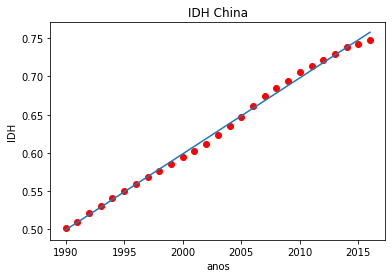

In [35]:
x_aprox = np.linspace(1990, 2016, 200)
y_aprox = np.zeros_like(x_aprox)
y_aprox += alpha[0] + alpha[1]*x_aprox

ano = 2017
previstos = []
reais = [0.750, 0.755, 0.761]
erros = []

for i in range(3):
  ano += i
  valor_previsto = round(alpha[0] + alpha[1]*ano, 3)
  previstos.append(valor_previsto)
  erros.append(abs(valor_previsto - reais[i])/reais[i])

d = {'year': [2017, 2018, 2019], 'IDH_real': reais, 'IDH_previsto': previstos, 'erro_relativo': erros}
df = pd.DataFrame(data=d)

print(df)

plt.plot(x, y, 'ro')
plt.plot(x_aprox, y_aprox)
plt.title('IDH China')
plt.xlabel('anos')
plt.ylabel('IDH')
plt.show()